In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import walk

# b) Data Preparation

In [2]:
train_paths=[]
test_paths=[]
all_paths=[]

path="../data/AReM/"

c=walk(path)

In [3]:
data_paths=[]
for (dirpath, dirnames, filenames) in walk(path):
    for dirs in dirnames:
        data_paths.append(dirpath+dirs)

In [4]:
for path in data_paths:
    dir_list=os.listdir(path)
    for file in dir_list:
        if "bending" in path and (file =="dataset1.csv" or file =="dataset2.csv"):
            #print(path+'/'+file)
            test_paths.append(path+'/'+file)
        elif file =="dataset1.csv" or file =="dataset2.csv" or file =="dataset3.csv" and "bending" not in path:
            test_paths.append(path+'/'+file)
        else:
            train_paths.append(path+'/'+file)
        
        all_paths.append(path+'/'+file)

In [5]:
print(len(train_paths))
#train_paths

69


In [6]:
print(len(test_paths))
#test_paths

19


# c) Feature Extraction

Types of features used for time series classification are:
time,
date,
day,
week,
month,
year,
hour,
minute,
seconds,
mean,
median,
min,max,
standard deviation,variance and many more..

In [7]:
feature_cols = pd.read_csv(train_paths[0],skiprows=4,error_bad_lines=False).columns
feature_cols=list(feature_cols)
feature_cols.remove('# Columns: time')

headers=['min','max','mean','median','std','first_quart','third_quart']
column_headers=[]

for i in range(1,7):
    column_headers += [c+str(i) for c in headers]
    
data_frame=pd.DataFrame(columns=column_headers)

In [8]:
data_frame

,min1,max1,mean1,median1,std1,first_quart1,third_quart1,min2,max2,mean2,...,std5,first_quart5,third_quart5,min6,max6,mean6,median6,std6,first_quart6,third_quart6


In [9]:
cols=["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
for path in all_paths:
    temp_df = pd.read_csv(path,skiprows=4,error_bad_lines=False)
    if temp_df.isnull().values.any():
        temp_df=pd.read_csv(path,delim_whitespace=True,skiprows=4,header=0,names=cols)
    data={}
    for i,feature in enumerate(feature_cols):
        temp_dict={"min"+str(i+1):temp_df[feature].min(),"max"+str(i+1):temp_df[feature].max(),"mean"+str(i+1):temp_df[feature].mean(),"median"+str(i+1):temp_df[feature].median(),"std"+str(i+1):temp_df[feature].std(),"first_quart"+str(i+1):temp_df[feature].quantile(0.25), "third_quart"+str(i+1):temp_df[feature].quantile(0.75)}
        data.update(temp_dict)
    data_frame=data_frame.append(data,ignore_index=True)

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [10]:
data_frame.head()

,min1,max1,mean1,median1,std1,first_quart1,third_quart1,min2,max2,mean2,...,std5,first_quart5,third_quart5,min6,max6,mean6,median6,std6,first_quart6,third_quart6
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94
3,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50


In [11]:
data_frame.std()

min1            9.569975
max1            4.394362
mean1           5.335700
median1         5.440054
std1            1.772185
first_quart1    6.153874
third_quart1    5.138925
min2            0.000000
max2            5.062729
mean2           1.574198
median2         1.412293
std2            0.884137
first_quart2    0.946386
third_quart2    2.125399
min3            2.956462
max3            4.875137
mean3           4.008228
median3         4.036396
std3            0.946670
first_quart3    4.220658
third_quart3    4.171628
min4            0.000000
max4            2.183625
mean4           1.166178
median4         1.145985
std4            0.458283
first_quart4    0.843405
third_quart4    1.552504
min5            6.124001
max5            5.741238
mean5           5.675543
median5         5.813782
std5            1.024918
first_quart5    6.096465
third_quart5    5.531720
min6            0.045838
max6            2.518921
mean6           1.154889
median6         1.086474
std6            0.517651


## Bootstrap and confidence interval

In [12]:
# f, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(2, 3, figsize=(12,8))
# sns.set_style("darkgrid")
# sns.distplot(df_std["avg_rss12_std"], ax=ax1, hist=False)
# sns.distplot(df_std["var_rss12_std"], ax=ax2, hist=False)
# sns.distplot(df_std["avg_rss13_std"], ax=ax3, hist=False)
# sns.distplot(df_std["var_rss13_std"], ax=ax4, hist=False)
# sns.distplot(df_std["avg_rss23_std"], ax=ax5, hist=False)
# sns.distplot(df_std["var_rss23_std"], ax=ax6, hist=False)

In [13]:
def bootstrap(data,size):
    
    bs_replicates=np.empty(size)
    
    for i in range(size):
        bs_sample=np.random.choice(data,size=len(data))
        bs_replicates[i]=np.std(bs_sample)
        
    return bs_replicates

In [14]:
data_frame

,min1,max1,mean1,median1,std1,first_quart1,third_quart1,min2,max2,mean2,...,std5,first_quart5,third_quart5,min6,max6,mean6,median6,std6,first_quart6,third_quart6
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935813,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600


In [15]:
df_bs = pd.DataFrame(columns=["Empirical_std","Bootstrap_std","Confidence_interval"])

In [16]:
df_bs

,Empirical_std,Bootstrap_std,Confidence_interval


In [17]:
feature_dict={}
for i,feature in enumerate(data_frame.columns):
    bs_values=bootstrap(data_frame[feature],10000)
    bs_dict={"Empirical_std":0,"Bootstrap_std":0,"Confidence_interval":0}
    bs_dict["Empirical_std"]=data_frame[feature].std()
    bs_dict["Bootstrap_std"]=np.mean(bs_values)
    bs_dict["Confidence_interval"]=np.percentile(bs_values,[5,95])

    df_bs=df_bs.append(bs_dict,ignore_index=True)

df_bs=df_bs.set_axis(data_frame.columns,axis="index")


In [18]:
df_bs

,Empirical_std,Bootstrap_std,Confidence_interval
min1,9.569975,9.441458,"[8.23193216573535, 10.737139038357066]"
max1,4.394362,4.300565,"[3.3152867896758225, 5.249431785836761]"
mean1,5.335700,5.261294,"[4.68741288220593, 5.837431755913876]"
median1,5.440054,5.366063,"[4.766715333414287, 5.954131294540764]"
std1,1.772185,1.749120,"[1.5593634836970087, 1.9377393877110227]"
first_quart1,6.153874,6.076212,"[5.540683616880244, 6.611542592351558]"
third_quart1,5.138925,5.059847,"[4.309989617496084, 5.810327759950923]"
min2,0.000000,0.000000,"[0.0, 0.0]"
max2,5.062729,5.001633,"[4.603885824767929, 5.375423640983368]"
mean2,1.574198,1.552813,"[1.3848524631486294, 1.6952992211797713]"


#### Feature selected are min, max and mean of 1,2 and 6 of each of train instances

In [46]:
headers=['min','max','mean']
column_headers=[]

for i in [1,2,6]:
    column_headers += [c+str(i) for c in headers]
    
df_train=pd.DataFrame(columns=column_headers)
for path in train_paths:
    temp_df = pd.read_csv(path,skiprows=4,error_bad_lines=False)
    if temp_df.isnull().values.any():
        temp_df=pd.read_csv(path,delim_whitespace=True,skiprows=4,header=0,names=cols)
    data={}
    for i,feature in enumerate(feature_cols):
        temp_dict={"min"+str(i+1):temp_df[feature].min(),"max"+str(i+1):temp_df[feature].max(),"mean"+str(i+1):temp_df[feature].mean()}
        data.update(temp_dict)
    if "bending" in path:
        target="bending"
    else:
        target="others"
    data.update({"Target":target})
    df_train=df_train.append(data,ignore_index=True)

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [47]:
df_train=df_train[['min1', 'max1', 'mean1', 'min2', 'max2', 'mean2', 'min6', 'max6', 'mean6','Target']]

In [48]:
df_train

,min1,max1,mean1,min2,max2,mean2,min6,max6,mean6,Target
0,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,bending
1,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,bending
2,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,bending
3,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,bending
4,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,bending
...,...,...,...,...,...,...,...,...,...,...
64,20.75,46.25,34.763333,0.0,12.68,4.223792,0.0,9.39,3.288271,others
65,21.50,51.00,34.935813,0.0,12.21,4.115750,0.0,10.21,3.280021,others
66,18.33,47.67,34.333042,0.0,12.48,4.396958,0.0,8.01,3.261583,others
67,18.33,45.75,34.599875,0.0,15.37,4.398833,0.0,8.86,3.289542,others


C:\Users\vishw\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\vishw\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\vishw\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


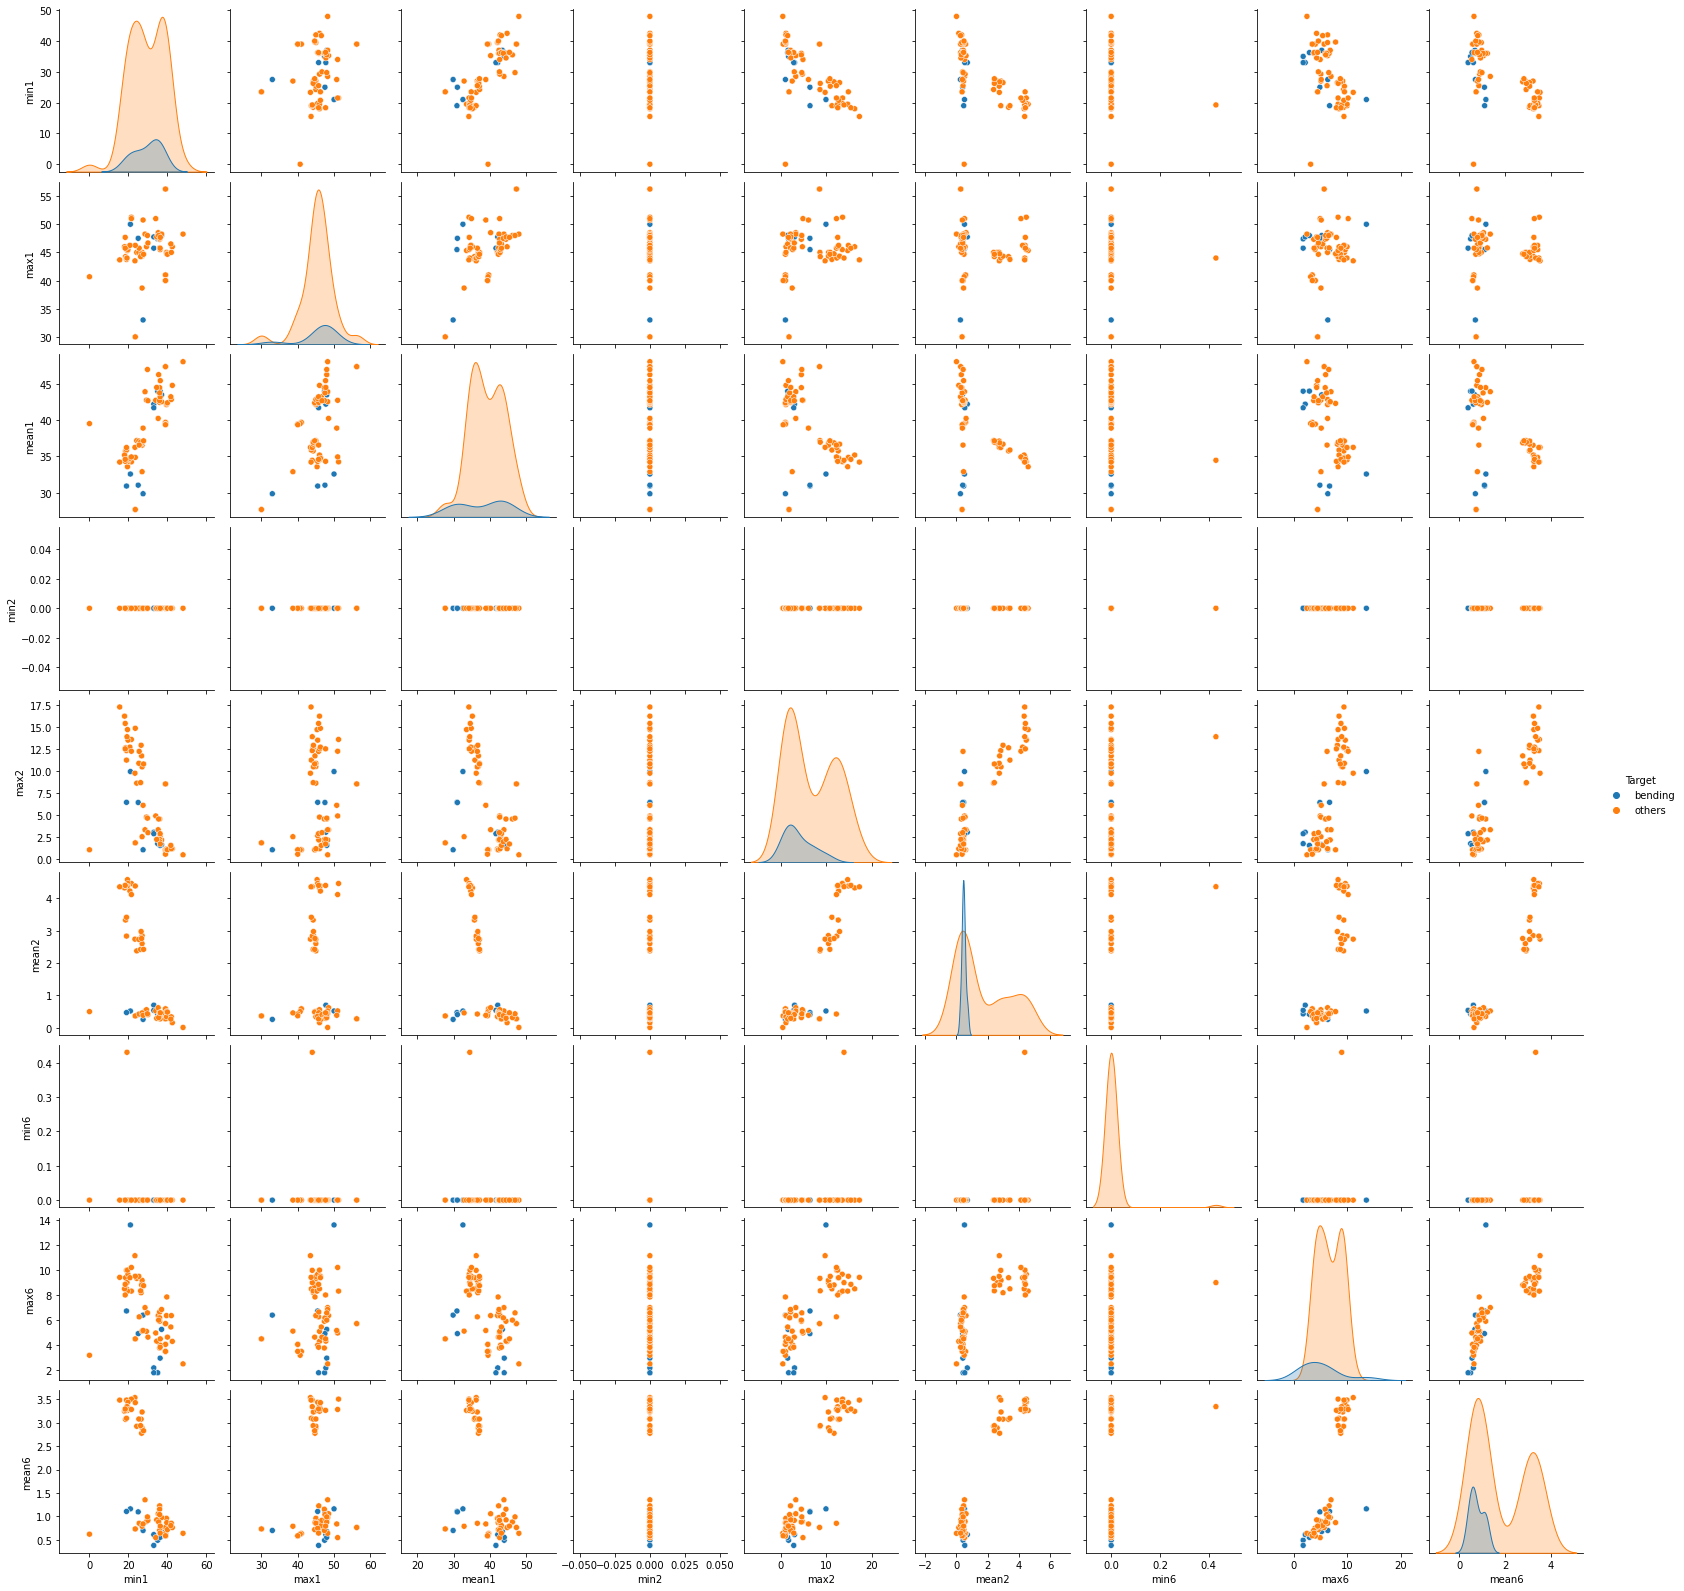

In [49]:
sns.pairplot(data=df_train,hue="Target")

In [2]:
df=pd.DataFrame()

In [9]:
list2=[22,22,66,44,33]
list3=["a","a","b","a","b"]
list1=[0,2,4,5,7]
df=pd.DataFrame(list(zip(list1,list2,list3)), columns=["x","pdf","class"] )

In [10]:
df

,x,pdf,class
0,0,22,a
1,2,22,a
2,4,66,b
3,5,44,a
4,7,33,b


<AxesSubplot:xlabel='x', ylabel='Density'>

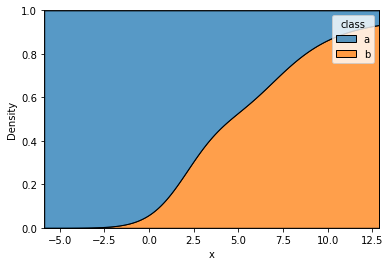

In [11]:
sns.kdeplot(data=df, x="x", hue="class", multiple="fill")

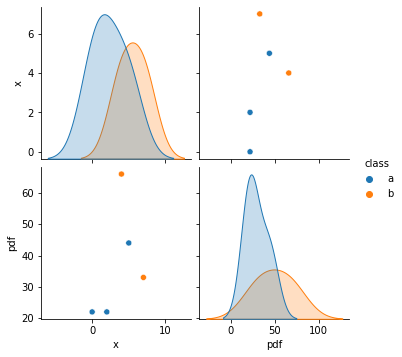

In [12]:
sns.pairplot(data=df,hue="class")